In [1]:
from src.functions import *

In [140]:
# Global variables
T = 0.1
gamma = 0.45
n_arr = [3,4,5,6,7,8]
num_random_models = 50

time_lims = (0.1,100) # Range of time values
time_steps = 200
time_range = np.geomspace(time_lims[0], time_lims[1], time_steps)

In [141]:
# NOTE: We evaluate the algorithm on the SAME 10 random instances for each point

In [142]:
def f(t,n,T,num_random_models):
    '''
    Calculate spectral gaps for quantum proposal.
    f(t) is defined to parallelize the time-loop.
    '''    
    delta_quantum_arr = np.zeros(num_random_models)
    for i in range(num_random_models):
        m = RandomIsingModel(n, seed=i)
        # Calculate delta for quantum proposal
        proposal_mat_quantum = get_proposal_mat_quantum(m, gamma, t)
        P_quantum = get_transition_matrix(m, T, proposal_mat_quantum)
        delta_quantum = get_delta(P_quantum)
        delta_quantum_arr[i] = delta_quantum
    return delta_quantum_arr


In [143]:
delta_quantum_arr = np.zeros((len(n_arr), time_steps, num_random_models))
for n_id, n in tqdm(enumerate(n_arr)):
    delta_quantum_arr[n_id] = np.asarray(joblib.Parallel(n_jobs=-1)(joblib.delayed(f)(t,n,T,num_random_models) for t in time_range))

0it [00:00, ?it/s]

6it [08:08, 81.36s/it] 


# Save the data

In [144]:
# grid_search = {'delta': delta_quantum_arr.tolist(),
#                'num_random_models': num_random_models,
#                'gamma_range': gamma_range.tolist(),
#                'time_range': time_range.tolist(),
#                'T': T,
#                'n': n}

# save_in_json(grid_search, f'data/delta_vs_t_n{n}.json')

# Average and plot the results

In [145]:
delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=2)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=2)

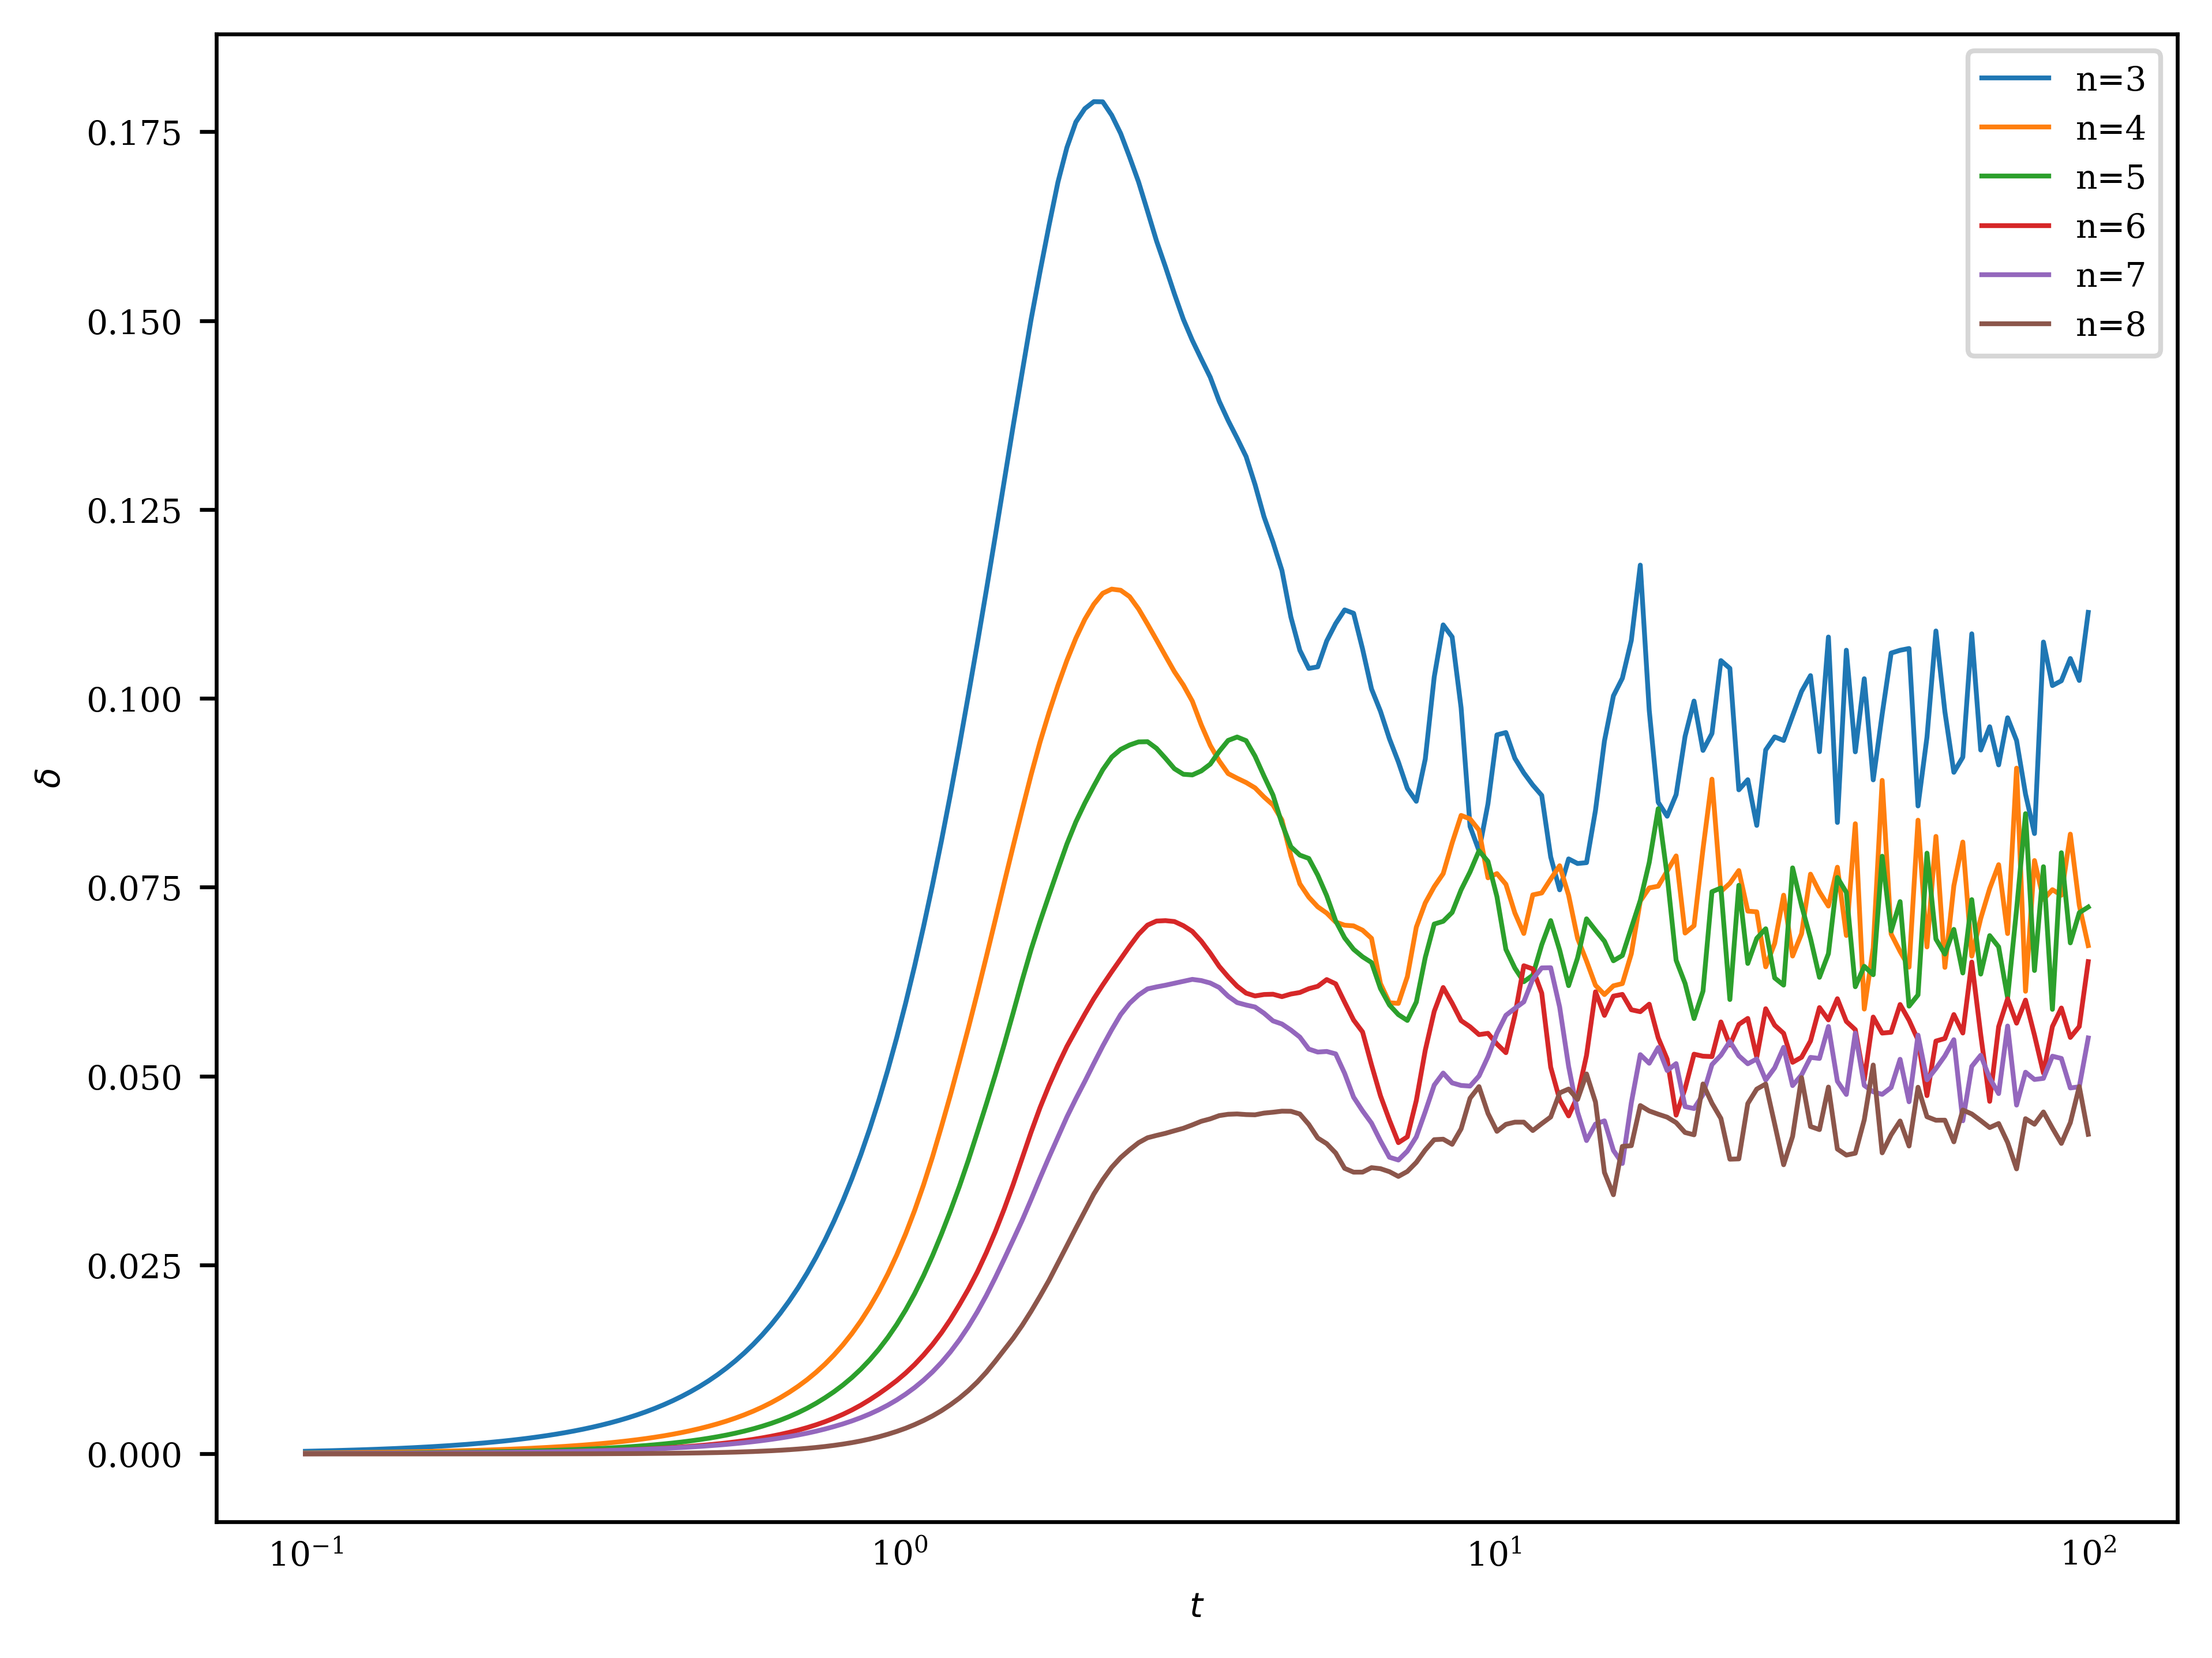

In [146]:
fig = plt.figure()

for n_id, n in enumerate(n_arr):
    plt.plot(time_range, 
            delta_quantum_arr_avg[n_id], 
            label=f'n={n}')

plt.xlabel('$t$')
plt.ylabel('$\delta$')
plt.xscale('log')
plt.legend()

fig.tight_layout()

# fig.savefig(local_path+f'figures/grid_search_n{n}')

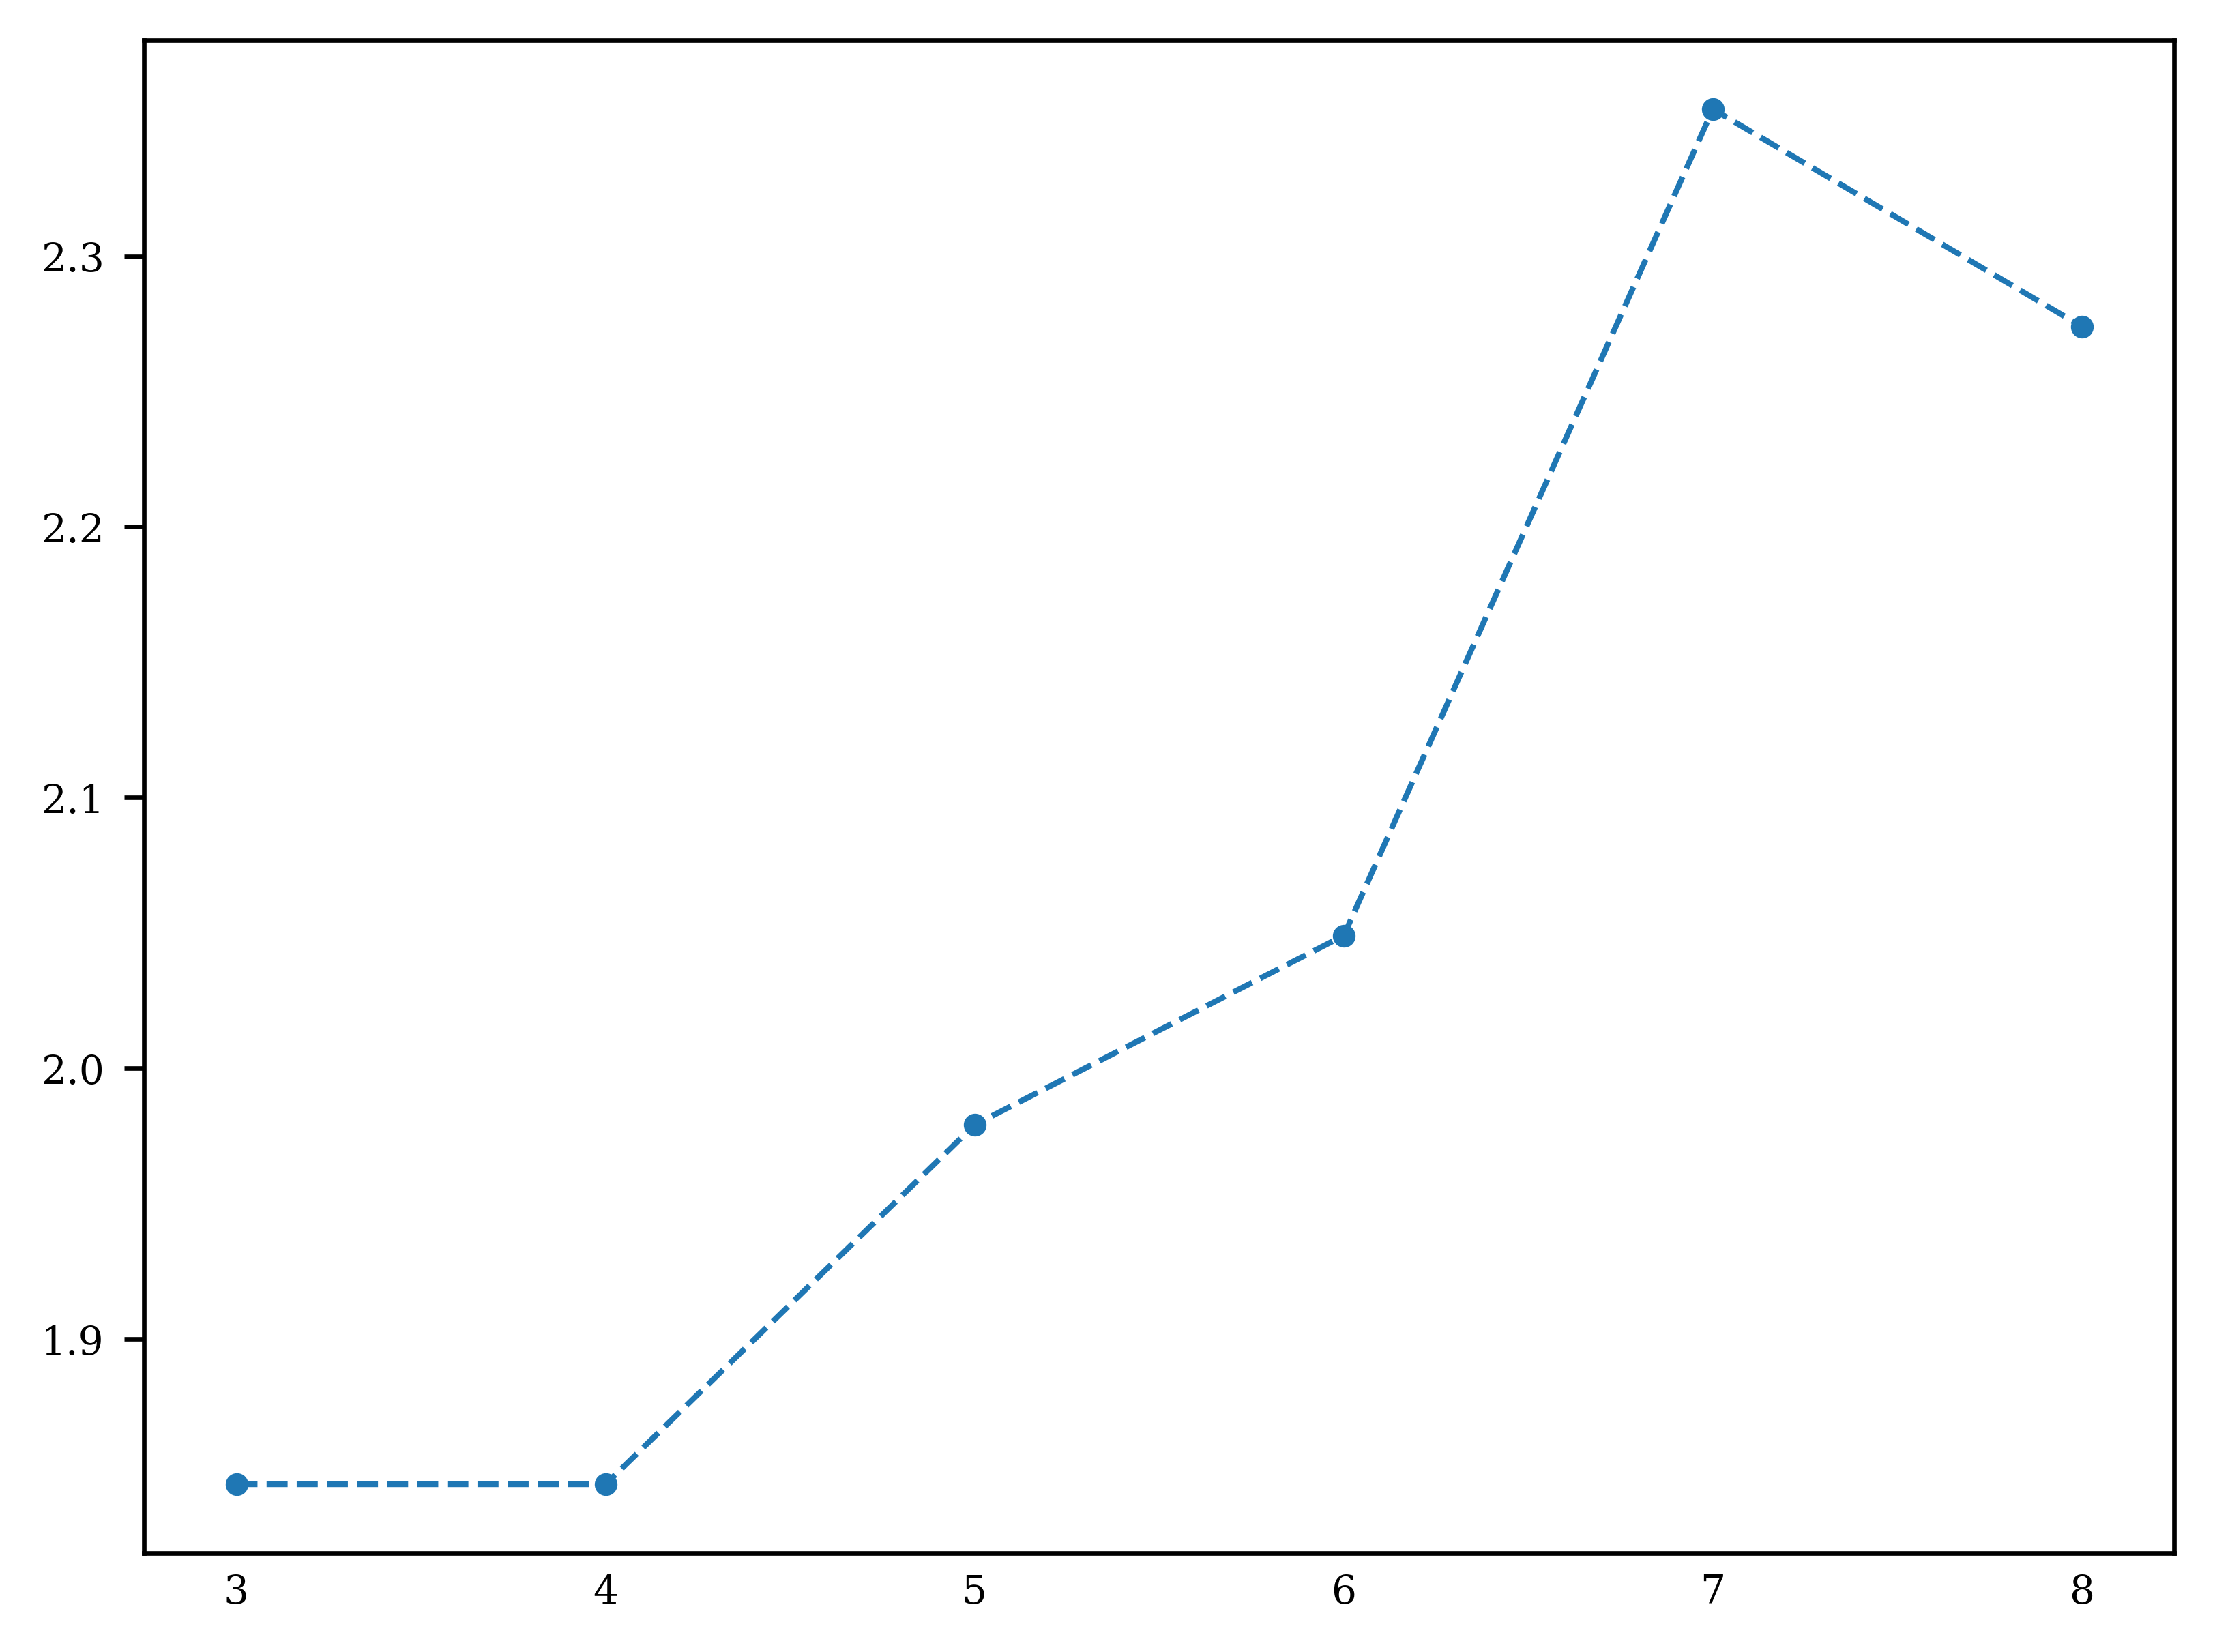

In [147]:
t_opt_arr = [time_range[np.argmin(time_range / delta_quantum_arr_avg[n_id])] for n_id in range(len(n_arr))]
plt.plot(n_arr, t_opt_arr, '.--')

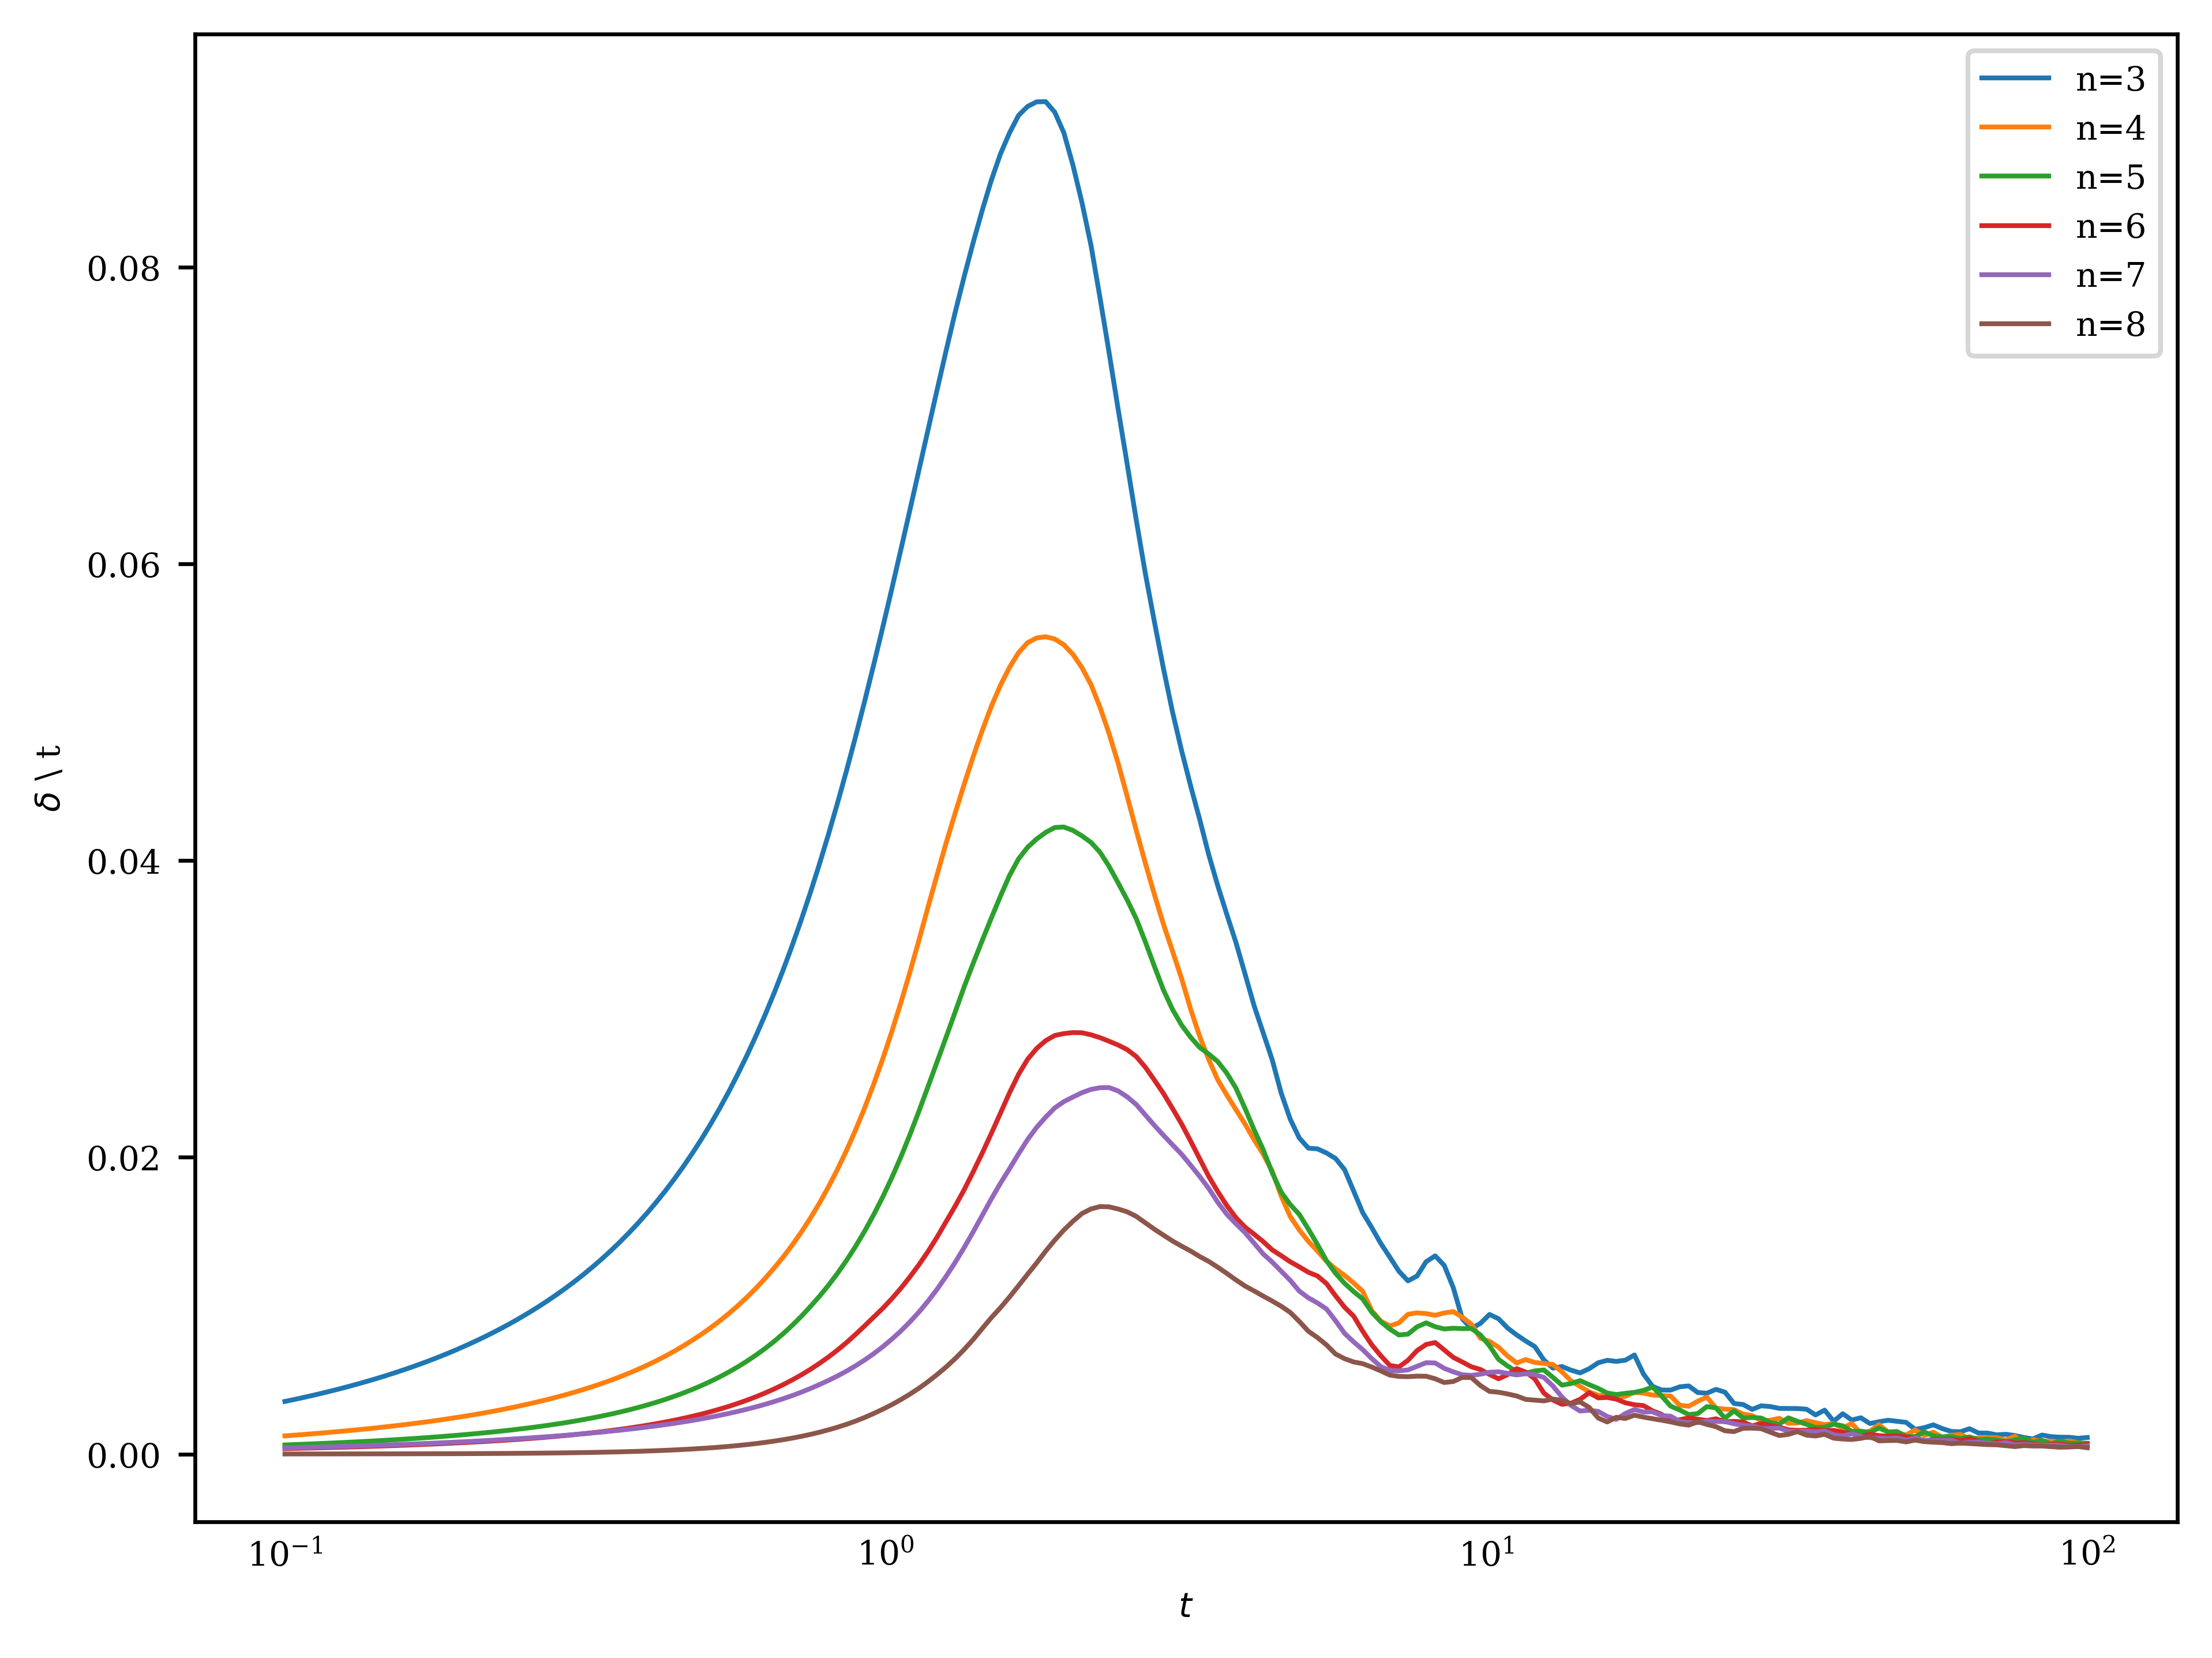

In [148]:
fig = plt.figure()

for n_id, n in enumerate(n_arr):
    plt.plot(time_range, 
            delta_quantum_arr_avg[n_id] / time_range, 
            label=f'n={n}')

# plt.xscale('log')
plt.xlabel('$t$')
plt.ylabel('$\delta$ \ t')
plt.xscale('log')
plt.legend()

fig.tight_layout()

# fig.savefig(local_path+f'figures/grid_search_n{n}')